## Definição do problema

- Equação para conversão: T(°F) = T(°C) × 9/5 + 32

## Importando as libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
tf.__version__

'2.17.0'

## Etapa 2: Importação da base de dados

In [ ]:
temperature_df = pd.read_csv('datasets/celsius-to-fahrenheit.csv')

temperature_df.reset_index(drop=True, inplace=True)
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


## Etapa 3: Visualização da base de dados

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

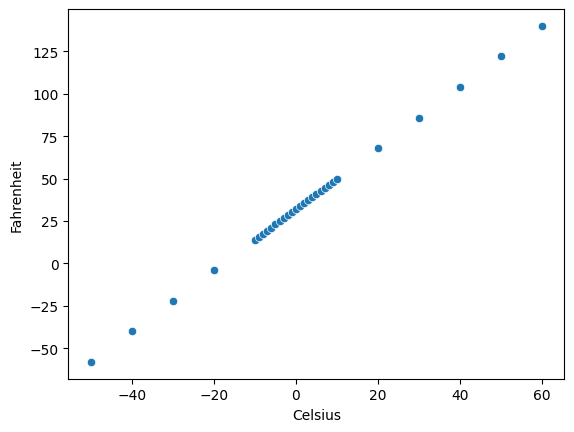

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

## Etapa 4: Configuração da base de dados de treinamento

In [ ]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

## Etapa 5: Construção e treinamento do modelo

In [ ]:
model = Sequential()
model.add(Dense(units=1, input_shape=[1]))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(0.1), loss='mean_squared_error')

In [ ]:
epochs = model.fit(x=X_train, y=y_train, epochs= 500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - loss: 0.0037
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.8370
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3136
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.0492
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.7772
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.0487
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5467
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0099
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6494
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.3477
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.2451
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5785
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0556
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0912
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4934
Epoch 16/500
1/1 

In [ ]:
epochs.history.keys()

dict_keys(['loss'])

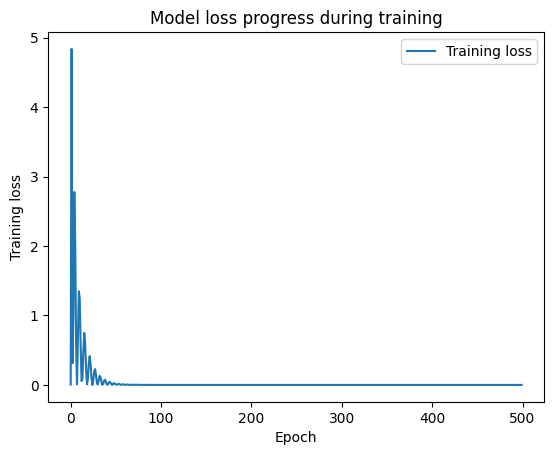

In [ ]:
plt.plot(epochs.history['loss'])

plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [ ]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
temp_c = 32
temp_f = model.predict(np.array([temp_c]))
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[89.6]], dtype=float32)

In [ ]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

89.6